#### https://www.youtube.com/watch?v=eMOA1pPVUc4&t=4192s

In [1]:
import pandas as pd
import os

#### Merging 12 months of sales data into a single file

In [2]:
#df=pd.read_csv('E:\Data Science\Datasets\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_April_2019.csv')

files = [file for file in os.listdir('E:\Data Science\Datasets\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data')]

all_months_data = pd.DataFrame()
for file in files:
    df=pd.read_csv('E:\Data Science\Datasets\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\/'+file)
    all_months_data = pd.concat([all_months_data,df])

all_months_data.to_csv('all_data.csv',index=False)

#### Read data in dataframe

In [3]:
all_data=pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Drop rows of NaN

In [4]:
all_data=all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Find 'Or' and delete it

In [5]:
all_data=all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Task 2: Add Month Column

In [6]:
all_data['Month']=all_data['Order Date'].str[:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Convert columns to the correct type

In [7]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

#### Task 3:Add a Sales Column

In [8]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task 4:Add a city column

In [9]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

#all_data = all_data.drop(columns='Column')
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### What was the best month for sales? How much was earned that month?

In [18]:
results = all_data.groupby('Month').sum()
results

C:\Users\Prem\AppData\Local\Temp\ipykernel_8692\894706187.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('Month').sum()


,Quantity Ordered,Price Each,Sales,Hour,Minute
Month,,,,,
1,10903,1811768.38,1822256.73,139485,282440
2,13449,2188884.72,2202022.42,172669,354885
3,17005,2791207.83,2807100.38,218969,447559
4,20558,3367671.02,3390670.24,262259,544186
5,18667,3135125.13,3152606.75,238780,487899
6,15253,2562025.61,2577802.26,195528,402436
7,16072,2632539.56,2647775.76,206169,417349
8,13448,2230345.42,2244467.88,172289,353857
9,13109,2084992.09,2097560.13,168513,341698


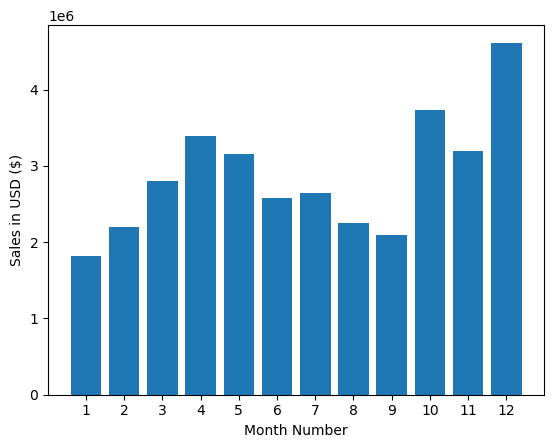

In [11]:
import matplotlib.pyplot as plt

months = range(1,13)

barplot=plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
#plt.bar_label(barplot,labels=results['Sales'],label_type='edge')
plt.show()

### Question 2: What city had the highest number of sales

In [12]:
results=all_data.groupby('City').sum()
results

C:\Users\Prem\AppData\Local\Temp\ipykernel_8692\3338049859.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results=all_data.groupby('City').sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


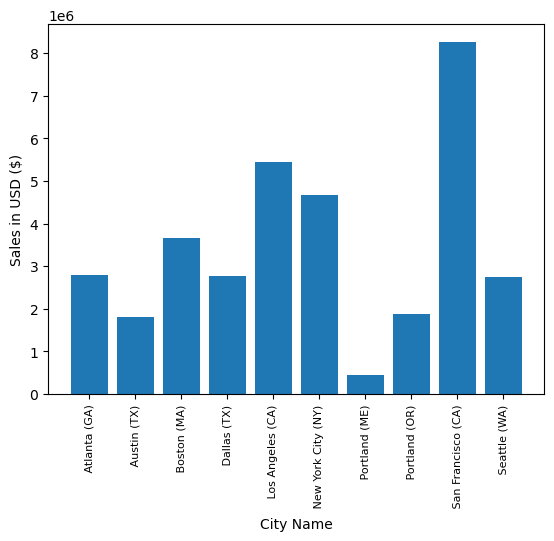

In [13]:
#cities = all_data['City'].unique()
cities = [city for city, df in all_data.groupby('City')]
barplot=plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
#plt.bar_label(barplot,labels=results['Sales'],label_type='edge')
plt.show()

#### Question 3: What time should we display ads to maxmize cursomer buying product?

In [14]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int32         
 7   Sales             185950 non-null  float64       
 8   City              185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 13.5+ MB


In [15]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


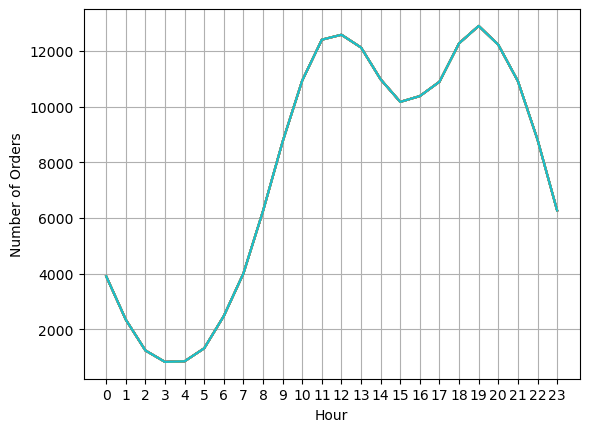

In [16]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

#### Question 4: What products are most often sold together?

In [17]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()
df.head(200)

C:\Users\Prem\AppData\Local\Temp\ipykernel_8692\3909534857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
5090,181419,"Apple Airpods Headphones,34in Ultrawide Monitor"
5107,181435,"AAA Batteries (4-pack),AA Batteries (4-pack)"
5149,181476,"Vareebadd Phone,Wired Headphones"
5189,181515,"Google Phone,Wired Headphones"
